In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

from matplotlib import pyplot

from sklearn.model_selection import train_test_split,GridSearchCV

import seaborn as Sns

In [2]:
dataset = pd.read_csv("Cleaned_kidney.csv")

In [3]:
dataset.head(10)

,Unnamed: 0,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.3,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
5,5,60.0,90.0,1.015,3.0,0.0,0,1,0,0,...,39.0,7800.0,4.4,1,1,0,0,1,0,0
6,6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,...,36.0,11000.0,4.6,0,0,0,0,0,0,0
7,7,24.0,70.0,1.015,2.0,4.0,1,0,0,0,...,44.0,6900.0,5.0,0,1,0,0,1,0,0
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,33.0,9600.0,4.0,1,1,0,0,0,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0


In [4]:
x = dataset.values[:,1:24]
y = dataset.values[:,25]

In [5]:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 47, test_size = 0.20)

Decision Tree

In [6]:

DT = DecisionTreeClassifier(criterion = 'gini')
DT.fit(X_train, Y_train)
y_pred =  DT.predict(X_test)

In [7]:
train_predictions = DT.predict(X_train)
test_predictions = DT.predict(X_test)

train_accuracy = accuracy_score(y_true=Y_train, y_pred=train_predictions)
test_accuracy = accuracy_score(y_true=Y_test, y_pred=test_predictions)

print('Accuracy Score on train data:', train_accuracy)
print('Accuracy Score on the test data:', test_accuracy)

Accuracy Score on train data: 1.0
Accuracy Score on the test data: 0.9875


              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        47
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


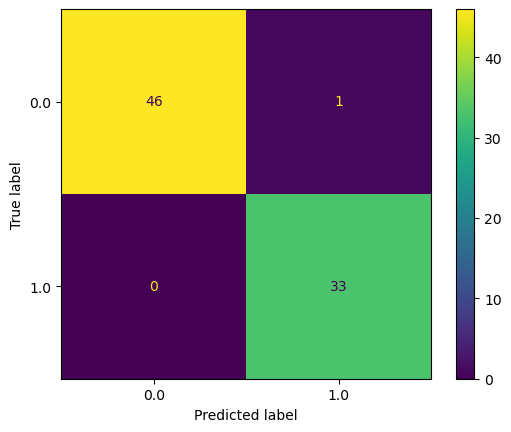

In [8]:
from sklearn.metrics import plot_confusion_matrix
  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(DT,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def plot_roc_curve(true_y, y_prob):
    fpr, tpr, thresholds = roc_curve(true_y, y_prob)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

AUC score: 0.9893617021276595


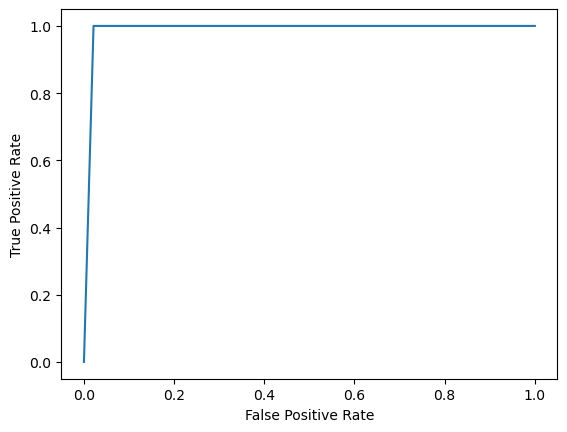

In [10]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

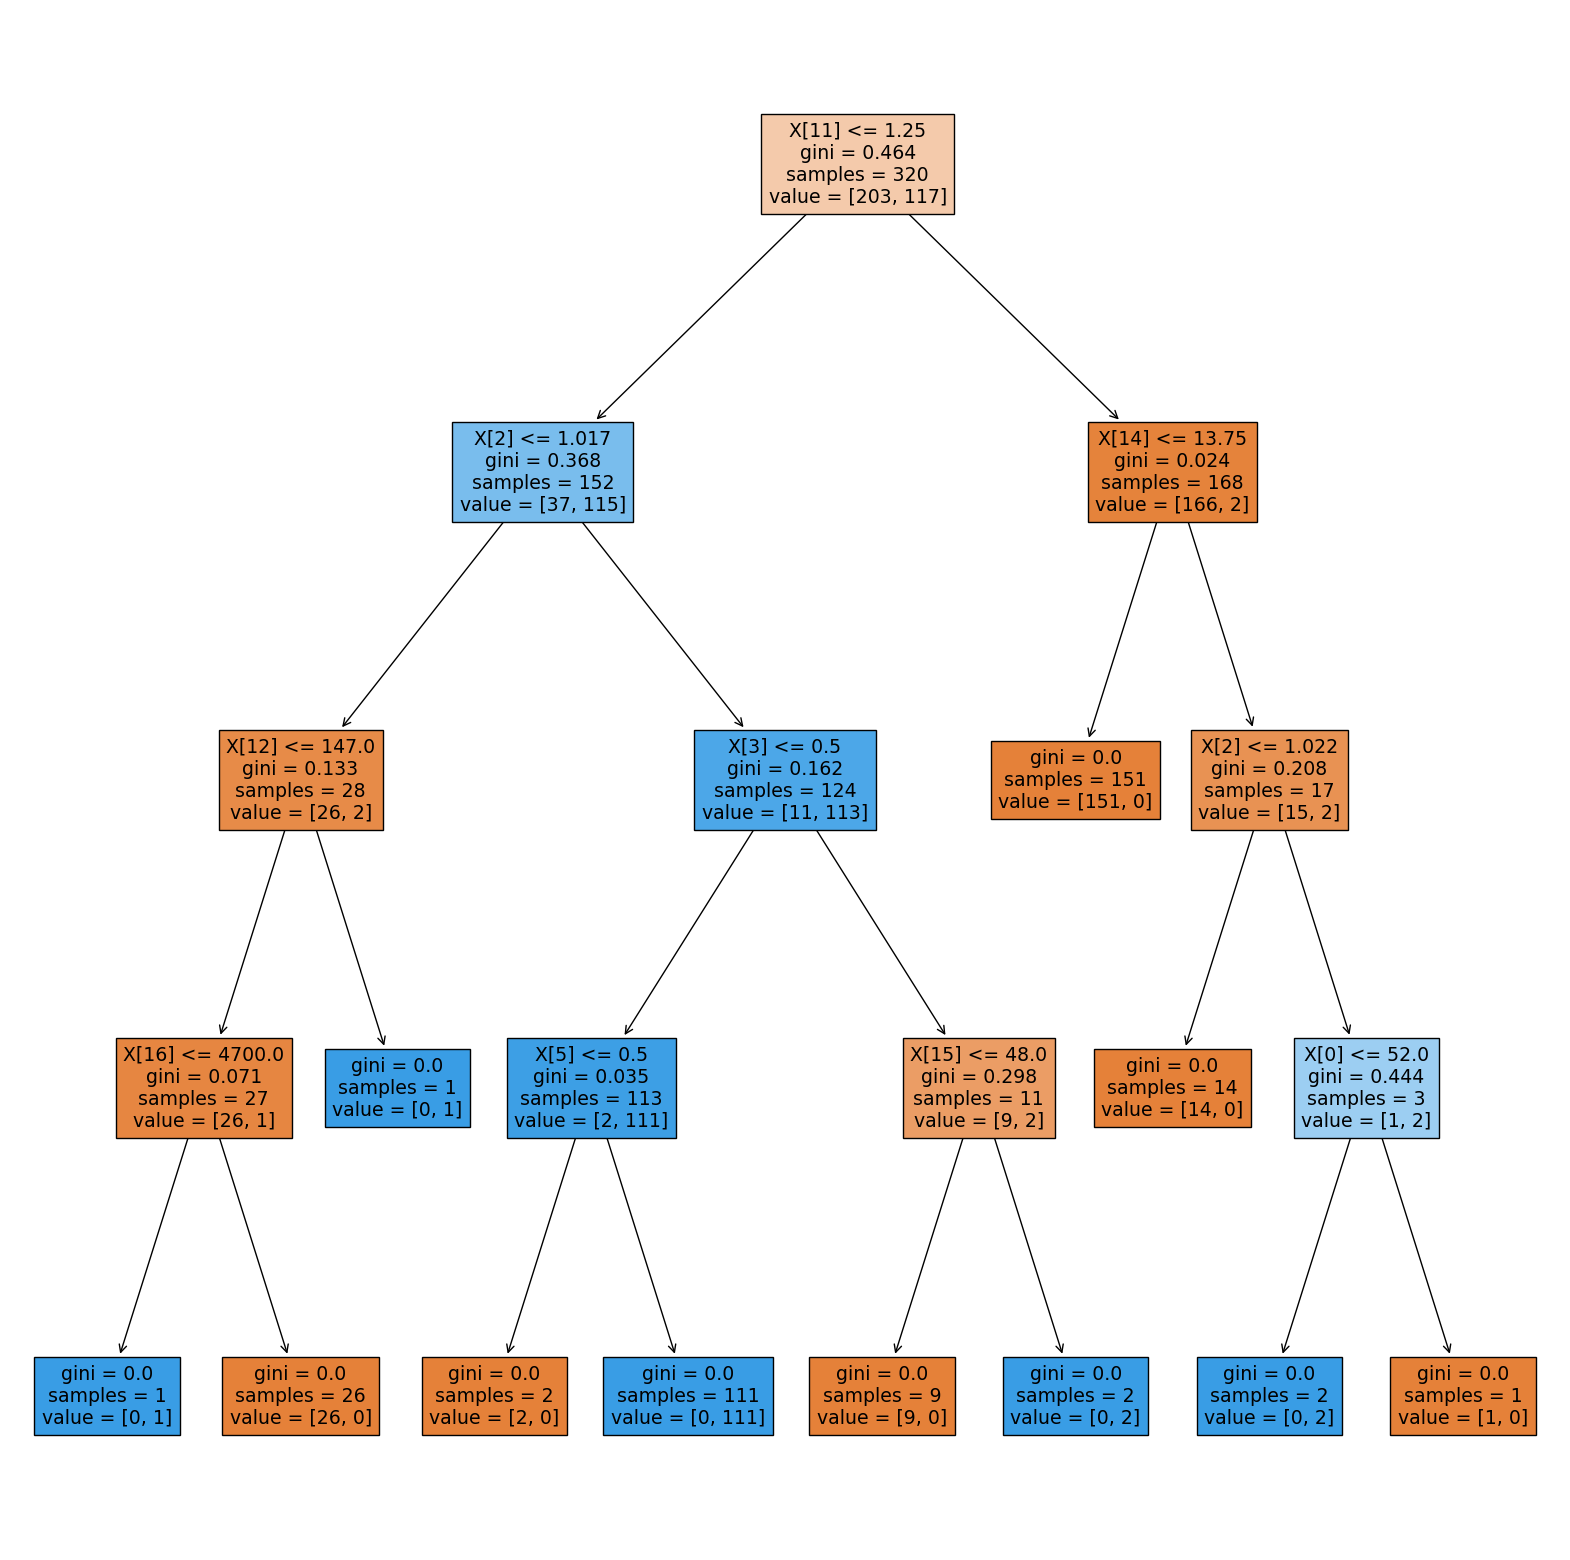

In [11]:
plt.figure(figsize=(20,20))
plot_tree(DT, filled=True)
plt.show()

In [12]:

nb = MultinomialNB(alpha=1.0,fit_prior=True)
nb.fit(X_train, Y_train)
acc=nb.score(X_train, Y_train)
print("Accuracy :",acc)

Accuracy : 0.84375


In [13]:
y_pred = nb.predict(X_test)
accuracy_score(Y_test, y_pred)
cm2 = confusion_matrix(Y_test, y_pred) 

              precision    recall  f1-score   support

         0.0       1.00      0.66      0.79        47
         1.0       0.67      1.00      0.80        33

    accuracy                           0.80        80
   macro avg       0.84      0.83      0.80        80
weighted avg       0.87      0.80      0.80        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


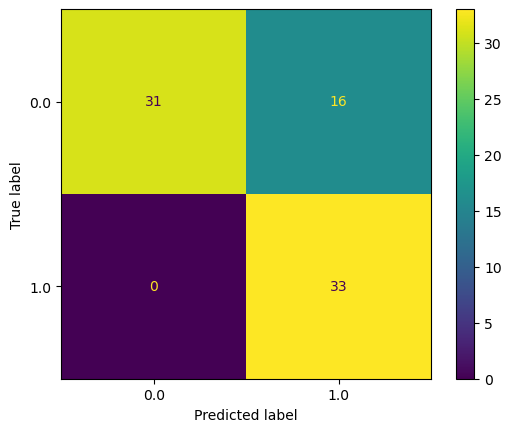

In [14]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(nb,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)


AUC score: 0.8297872340425532


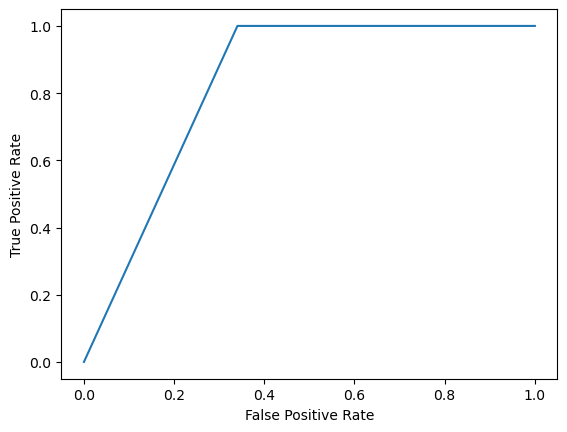

In [15]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

SVM

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [17]:
# import SVC classifier



# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(gamma='auto') 


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

In [18]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)

Accuracy 0.975


In [19]:
cm3 = confusion_matrix(Y_test, y_pred)  
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        47
         1.0       1.00      0.94      0.97        33

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


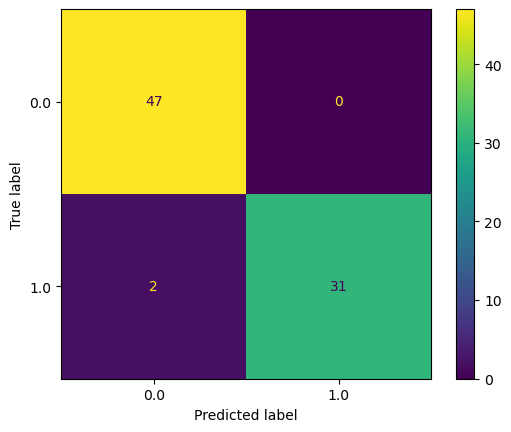

In [20]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,X_test,Y_test)

AUC score: 0.9696969696969697


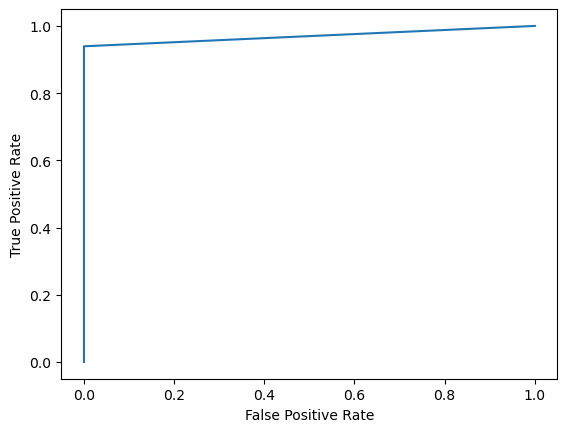

In [21]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

Perceptron

In [22]:
pn = Perceptron(eta0=0.15, random_state=0)
pn.fit(X_train, Y_train)

Perceptron(eta0=0.15)

In [23]:
y_pred = pn.predict(X_test)

In [24]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)



Accuracy 0.975


In [25]:
cm4 = confusion_matrix(Y_test, y_pred)  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        47
         1.0       0.97      0.97      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


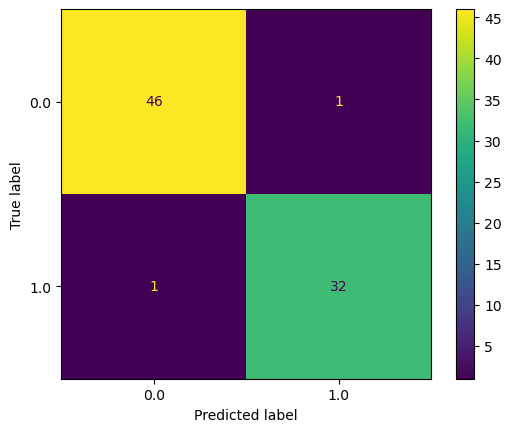

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pn,X_test,Y_test)

AUC score: 0.9742101869761445


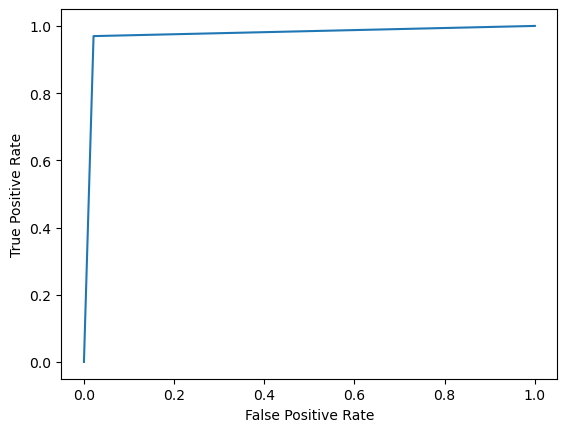

In [27]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

Multinomial NB: 0.9531 (0.0288)
Decision Tree: 0.9563 (0.0424)
Perceptron: 0.9688 (0.0370)
SVC: 0.9781 (0.0281)


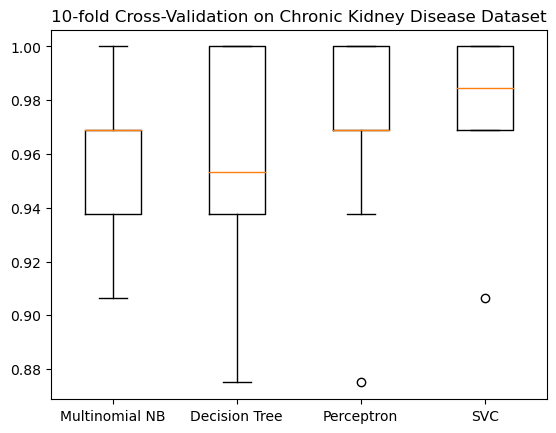

In [28]:

models = [
    ('Multinomial NB', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy')),
    ('Perceptron', Perceptron(eta0=0.1, random_state=0)),
    ('SVC', SVC(gamma='auto'))
]

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')

plt.boxplot(results, labels=names)
plt.title('10-fold Cross-Validation on Chronic Kidney Disease Dataset')
plt.show()

In [29]:
#HyperPramaeters

In [30]:
dataset = pd.read_csv("Cleaned_kidney.csv")

In [31]:
dataset.head(10)

,Unnamed: 0,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,0,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.3,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
5,5,60.0,90.0,1.015,3.0,0.0,0,1,0,0,...,39.0,7800.0,4.4,1,1,0,0,1,0,0
6,6,68.0,70.0,1.010,0.0,0.0,1,1,0,0,...,36.0,11000.0,4.6,0,0,0,0,0,0,0
7,7,24.0,70.0,1.015,2.0,4.0,1,0,0,0,...,44.0,6900.0,5.0,0,1,0,0,1,0,0
8,8,52.0,100.0,1.015,3.0,0.0,1,0,1,0,...,33.0,9600.0,4.0,1,1,0,0,0,1,0
9,9,53.0,90.0,1.020,2.0,0.0,0,0,1,0,...,29.0,12100.0,3.7,1,1,0,1,0,1,0


In [32]:
x = dataset.values[:,1:24]
y = dataset.values[:,25]

In [33]:

X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state = 47, test_size = 0.20)

Decision Tree

In [34]:

DT = DecisionTreeClassifier(criterion = 'gini',max_depth=7,min_samples_leaf=5, min_samples_split=5)
DT.fit(X_train, Y_train)
y_pred =  DT.predict(X_test)

In [35]:
train_predictions = DT.predict(X_train)
test_predictions = DT.predict(X_test)

train_accuracy = accuracy_score(y_true=Y_train, y_pred=train_predictions)
test_accuracy = accuracy_score(y_true=Y_test, y_pred=test_predictions)

print('Accuracy Score on train data:', train_accuracy)
print('Accuracy Score on the test data:', test_accuracy)

Accuracy Score on train data: 0.975
Accuracy Score on the test data: 1.0


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        47
         1.0       1.00      1.00      1.00        33

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


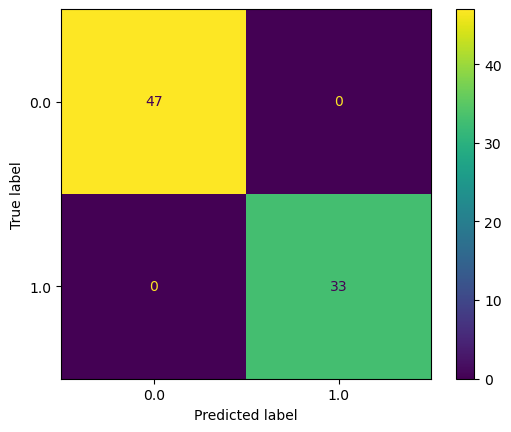

In [36]:
from sklearn.metrics import plot_confusion_matrix
  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(DT,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)

AUC score: 1.0


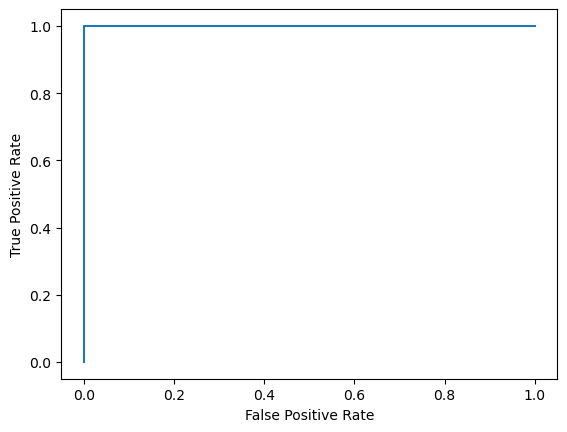

In [37]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

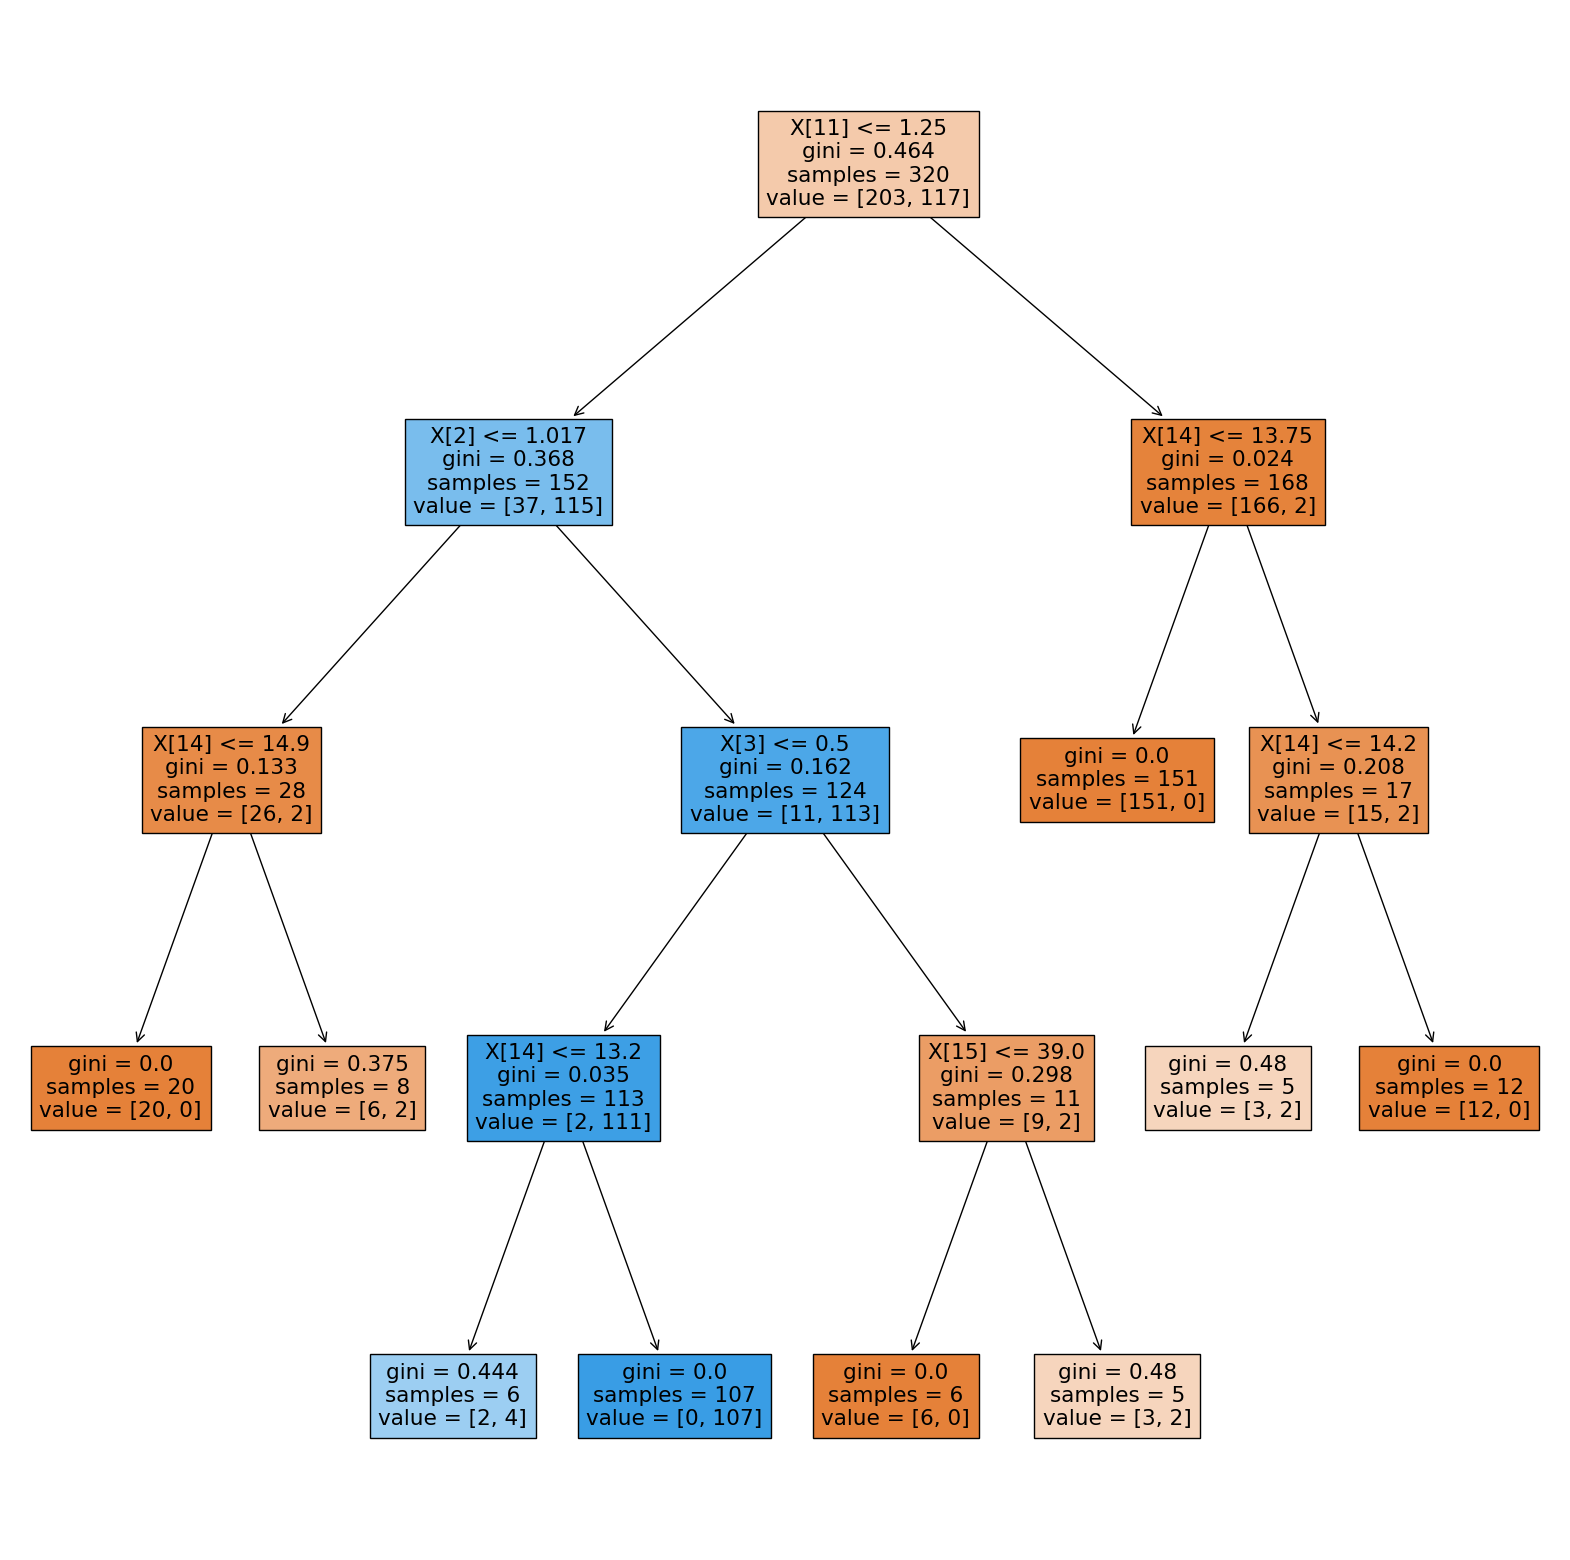

In [38]:
plt.figure(figsize=(20,20))
plot_tree(DT, filled=True)
plt.show()

In [39]:

nb = MultinomialNB(alpha=0.2, fit_prior=True, class_prior=None)
nb.fit(X_train, Y_train)
acc=nb.score(X_train, Y_train)
print("Accuracy :",acc)

Accuracy : 0.8625


In [40]:
y_pred = nb.predict(X_test)
accuracy_score(Y_test, y_pred)
cm2 = confusion_matrix(Y_test, y_pred) 

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81        47
         1.0       0.69      1.00      0.81        33

    accuracy                           0.81        80
   macro avg       0.84      0.84      0.81        80
weighted avg       0.87      0.81      0.81        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


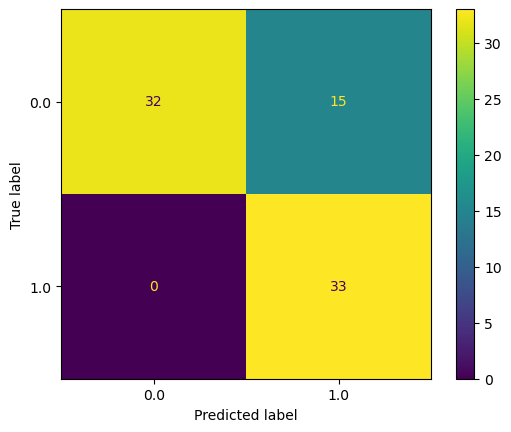

In [41]:

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

plot_confusion_matrix(nb,X_test,Y_test)
cm1 = confusion_matrix(Y_test, y_pred)


AUC score: 0.8404255319148937


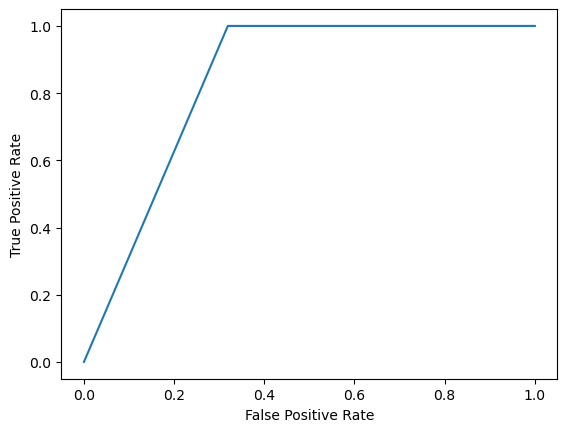

In [42]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

SVM

In [43]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [44]:
# import SVC classifier



# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(C=25, kernel='rbf', gamma='scale')


# fit classifier to training set
svc.fit(X_train,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

In [45]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)

Accuracy 0.975


In [46]:
cm3 = confusion_matrix(Y_test, y_pred)  
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        47
         1.0       1.00      0.94      0.97        33

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.97        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


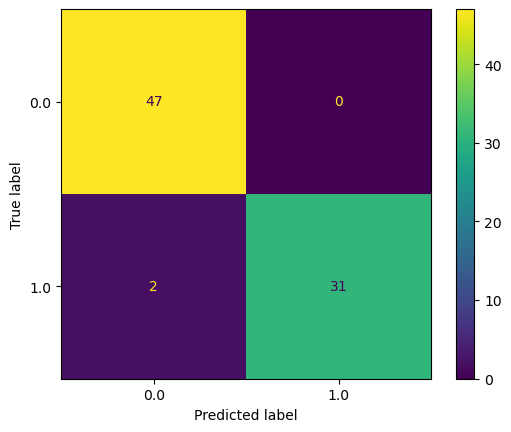

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svc,X_test,Y_test)

AUC score: 0.9696969696969697


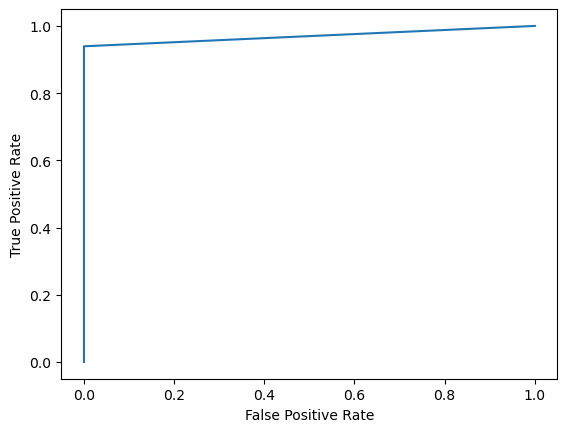

In [48]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

Perceptron

In [49]:
pn = Perceptron(eta0=0.1, random_state=1, max_iter=100)
pn.fit(X_train, Y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [50]:
y_pred = pn.predict(X_test)

In [51]:
# compute and print accuracy score
acc=accuracy_score(Y_test, y_pred)
print("Accuracy",acc)



Accuracy 0.9875


In [52]:
cm4 = confusion_matrix(Y_test, y_pred)  


from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        47
         1.0       1.00      0.97      0.98        33

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



H:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


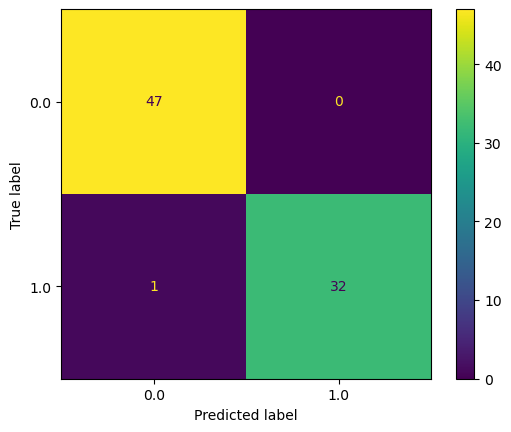

In [53]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pn,X_test,Y_test)

AUC score: 0.9848484848484849


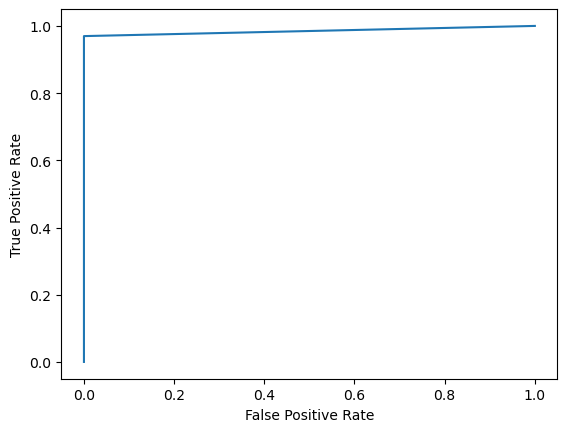

In [54]:
plot_roc_curve(Y_test, y_pred)
print(f'AUC score: {roc_auc_score(Y_test, y_pred)}')

MultinomialNB: 0.9531 (0.0288)
Decision Tree: 0.9531 (0.0349)
Perceptron: 0.9688 (0.0370)
SVC: 0.9781 (0.0281)


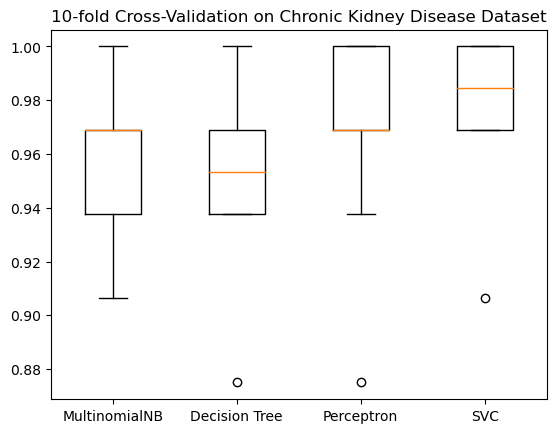

In [55]:

models = [
    ('MultinomialNB', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(criterion='entropy')),
    ('Perceptron', Perceptron(eta0=0.1, random_state=0)),
    ('SVC', SVC(gamma='auto'))
]

results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})')

plt.boxplot(results, labels=names)
plt.title('10-fold Cross-Validation on Chronic Kidney Disease Dataset')
plt.show()